In [1]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


In [2]:
df = pd .read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df_missing = df.isnull().sum()
df_missing


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
data = pd.DataFrame(df)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [5]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
optimal_k = kl.elbow

kmeans = KMeans(n_clusters=optimal_k,init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\amar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

C:\Users\amar\AppData\Local\Temp\ipykernel_17680\2634300047.py:22: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 6
  plt.legend(handles=handles, labels=labels + ['Cluster Centers'])


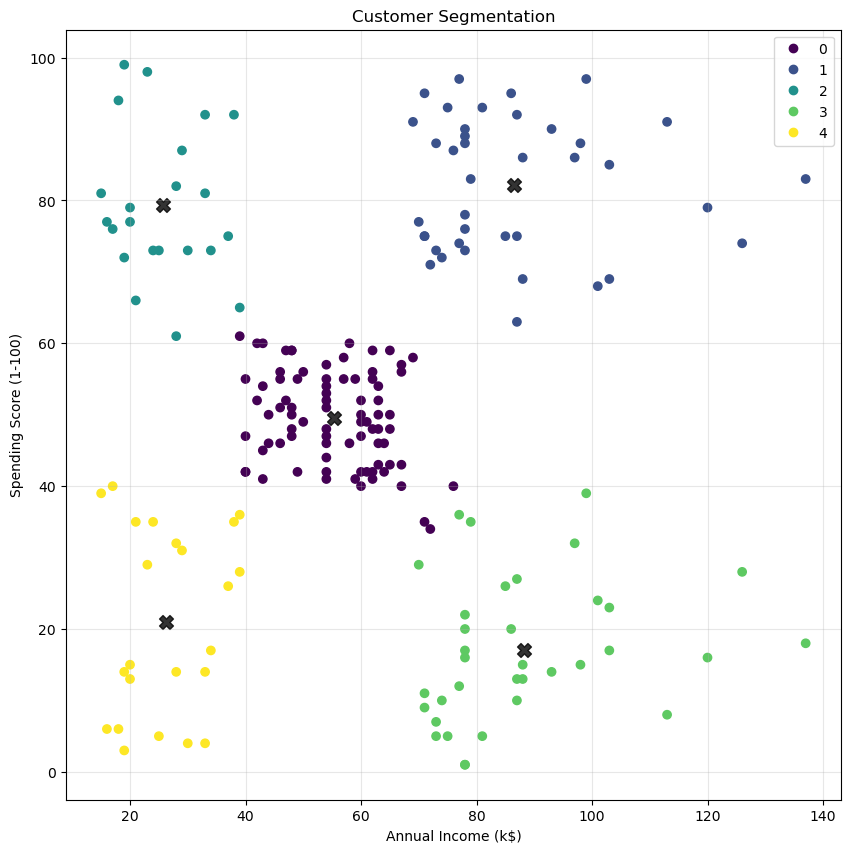

In [6]:
data['Cluster'] = clusters
plt.figure(figsize=(10, 10))

# رسم النقاط مع تلوين حسب الكلاستر
scatter = plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], 
                      c=data['Cluster'], cmap='viridis', alpha=1)

# رسم مراكز الكلاسترز
centers = scaler.inverse_transform(kmeans.cluster_centers_)
scatter_centers = plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8, marker='X', label='Cluster Centers')

# إضافة العنوان والمحاور
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# إضافة الشبكة
plt.grid(True, alpha=0.3)

# إضافة اللجند مع تخصيص كل عنصر
handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=labels + ['Cluster Centers'])
plt.savefig('cluster.png', dpi=300)
plt.show()


In [7]:
print("\nCluster Summary:")
print(data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())
print("\nCustomers per cluster:") # النسبة المئوية للكلاسترز
print(data['Cluster'].value_counts(normalize=True).sort_index() * 100)
cluster_descriptions = []

for cluster_id, row in data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().iterrows():
    income, spending = row
    if income > 70 and spending > 70:
        description = "High Income & High Spending"
    elif income > 70:
        description = "High Income & Low Spending"
    elif spending > 70:
        description = "Low Income & High Spending"
    else:
        description = "Low Income & Low Spending"
    
    # إضافة الوصف لكل Cluster في القائمة
    cluster_descriptions.append(description)

# إضافة الوصف كعمود جديد في الـ DataFrame
data['Cluster Description'] = data['Cluster'].map(lambda x: cluster_descriptions[x])



Cluster Summary:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

Customers per cluster:
Cluster
0    40.5
1    19.5
2    11.0
3    17.5
4    11.5
Name: proportion, dtype: float64


In [8]:
print("\nData with Cluster Description:")
data


Data with Cluster Description:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster Description
0,1,Male,19,15,39,4,Low Income & Low Spending
1,2,Male,21,15,81,2,Low Income & High Spending
2,3,Female,20,16,6,4,Low Income & Low Spending
3,4,Female,23,16,77,2,Low Income & High Spending
4,5,Female,31,17,40,4,Low Income & Low Spending
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,High Income & High Spending
196,197,Female,45,126,28,3,High Income & Low Spending
197,198,Male,32,126,74,1,High Income & High Spending
198,199,Male,32,137,18,3,High Income & Low Spending
